In [18]:
import boto3
import pandas as pd; pd.set_option('display.max_columns', 100)
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics import silhouette_score

s3 = boto3.resource('s3')
bucket_name = 'grant-gonnerman-data-445'
bucket = s3.Bucket(bucket_name)

file_key = 'circle_data.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

# reading data file
circle = pd.read_csv(file_content_stream)
circle.head()

,x,y
0,0.421362,0.161185
1,-0.385647,0.449012
2,0.425654,-0.100170
3,-0.574566,0.741009
4,-0.255552,0.572340


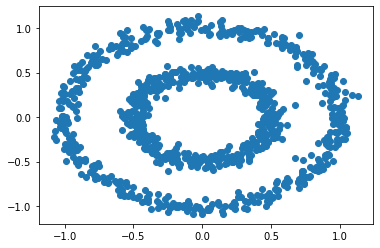

In [19]:
import matplotlib.pyplot as plt
plt.scatter(circle['x'], circle['y'])

In [ ]:
# from the plot above we can see two groups, a smaller circle inside of a larger circle

In [20]:
# scaling the data
scaler = MinMaxScaler()

circle[['x_0_1', 'y_0_1']] = scaler.fit_transform(circle)

In [22]:
specral_clustering = SpectralClustering(n_clusters = 2, affinity = 'nearest_neighbors', n_neighbors = 20).fit(circle[['x_0_1', 'y_0_1']])

circle['spectral_cluster'] = specral_clustering.labels_
circle.head()

,x,y,x_0_1,y_0_1,spectral_cluster
0,0.421362,0.161185,0.677955,0.562456,1
1,-0.385647,0.449012,0.313458,0.692048,1
2,0.425654,-0.100170,0.679893,0.444782,1
3,-0.574566,0.741009,0.228130,0.823518,0
4,-0.255552,0.572340,0.372217,0.747576,1


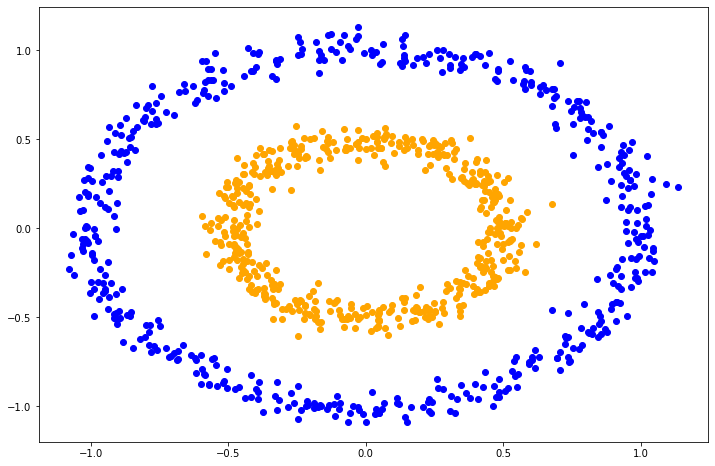

In [25]:
colors = ['blue', 'orange']

plt.figure(figsize = (12,8))

for i in circle['spectral_cluster'].unique():
    temp = circle[circle['spectral_cluster'] == i]
    plt.scatter(temp['x'], temp['y'], color = colors[i])